# TECHNOHACKS EDUTECH INTERNSHIP - DATA SCIENCE

### House Price Prediction - Task 1

Use a Dataset That Includes Information About Housing Prices and Features Like Square Footage , Number Of Bedrooms Etcc. To Train a Model That Can Predict The Price Of a New House.

House Price Prediction Is a Machine Learning Task That Involves Using Historical Data To Built a Model Capable Of Estimating The Prices Of Houses Based On Various Features Or Attributes. This Process Is Essential For Real Estate , Financial Planning and Investmebt Decisions. Here's an Explanation Of The Key Steps Involved In House Price Prediction.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
from sklearn.linear_model import LinearRegression

### Read The File

In [2]:
file_path=("C:\\Users\\Navya\\OneDrive\\Desktop\\OneDrive\\Documents\\Data Sets.csv")
hp_df=pd.read_csv(file_path)
hp_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
num_rows = hp_df.shape[0]
num_columns = hp_df.shape[1]
print("Number Of Rows {}".format(num_rows))
print("Number Of Columns {}".format(num_columns))

Number Of Rows 21613
Number Of Columns 21


In [4]:
hp_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
hp_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
hp_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
hp_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312049,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540182.158793,367362.231718,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,NaN,NaN,NaN,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,NaN,NaN,NaN,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaN,NaN,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaN,NaN,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaN,NaN,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,NaN,NaN,NaN,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,NaN,NaN,NaN,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0


In [9]:
hp_df.drop("id",axis=1,inplace=True)

In [10]:
hp_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
hp_df["date"]=le.fit_transform(hp_df["date"])
hp_df['date'].dtype

dtype('int32')

### EXPLORATORY DATA ANALYSIS

#### Count The Number Of Houses With Unique Floor Values

In [12]:
hp_df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


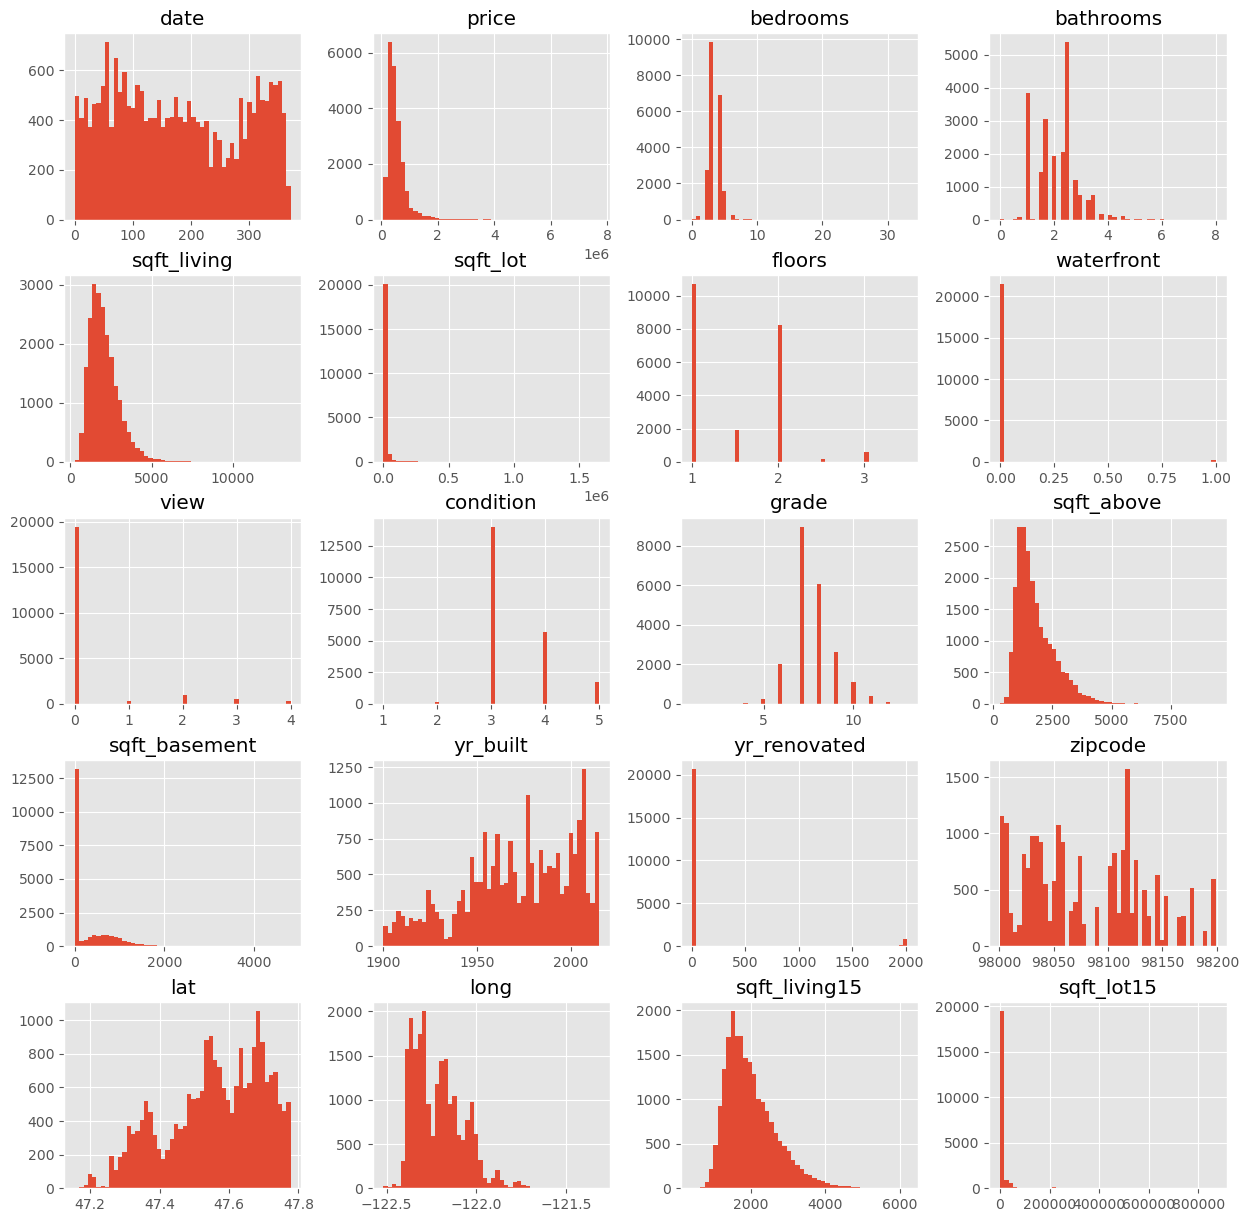

In [13]:
hp_df.hist(bins=50,figsize=(15,15))
plt.show()

### Determine Whether Houses With a WaterFront View Or without a WaterFront View Have More Price Outliers.

<Axes: xlabel='waterfront', ylabel='price'>

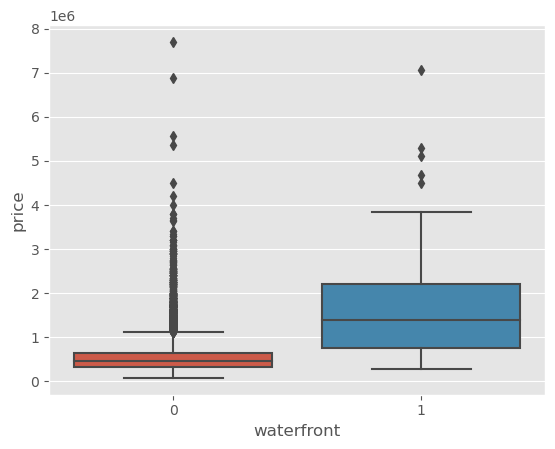

In [14]:
sns.boxplot(data=hp_df,x=hp_df['waterfront'],y=hp_df['price'])

### Determine If The Feature Sqft_above Is Negatively Or Positively Correlated With Price.

<Axes: xlabel='sqft_above', ylabel='price'>

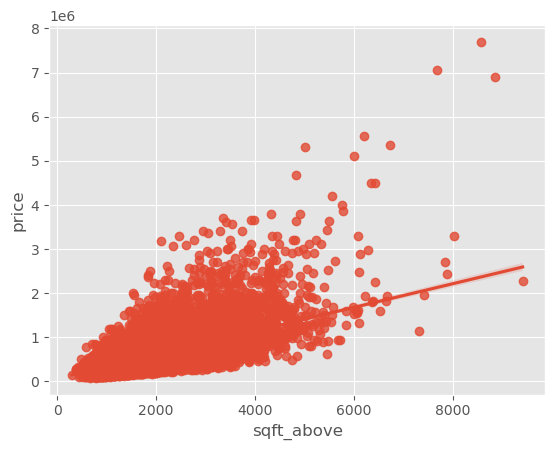

In [15]:
sns.regplot(data=hp_df,x=hp_df['sqft_above'],y=hp_df['price'])

<Axes: xlabel='sqft_basement', ylabel='price'>

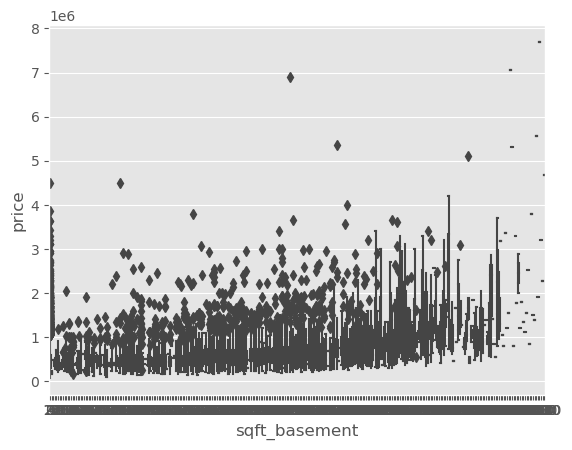

In [16]:
sns.boxplot(data=hp_df,x=hp_df['sqft_basement'],y=hp_df['price'])

<Axes: xlabel='floors', ylabel='price'>

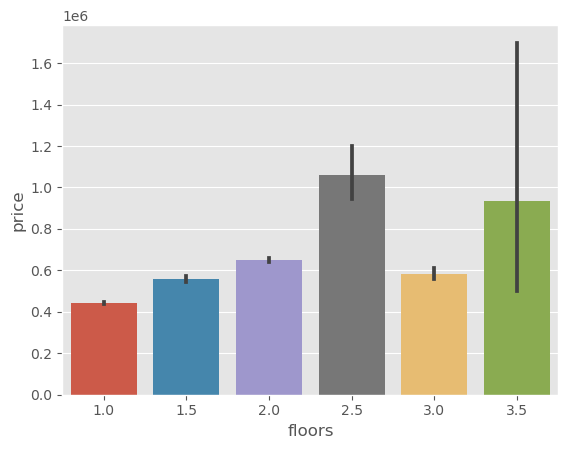

In [17]:
sns.barplot(data=hp_df,x=hp_df['floors'],y=hp_df['price'])

<Axes: xlabel='grade', ylabel='price'>

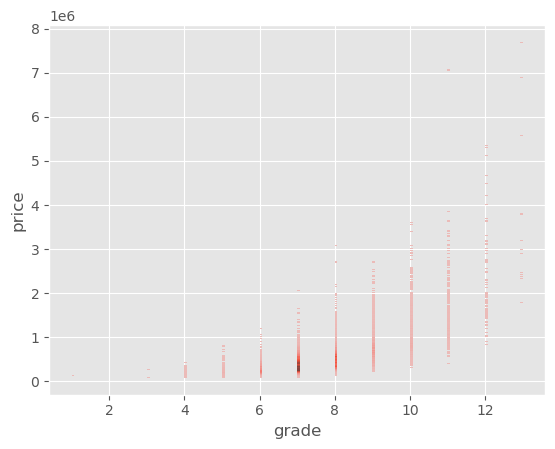

In [18]:
sns.histplot(data=hp_df,x=hp_df['grade'],y=hp_df['price'])

<Axes: xlabel='grade', ylabel='price'>

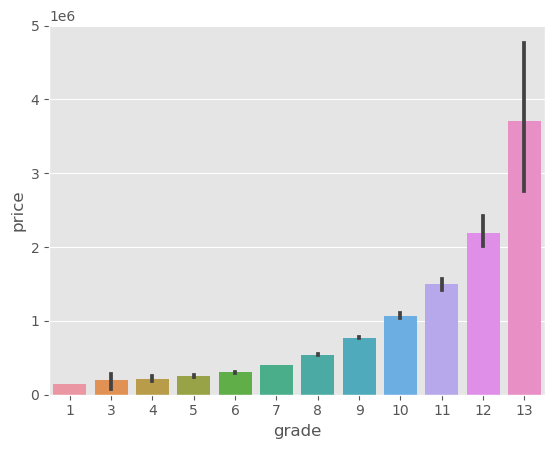

In [19]:
sns.barplot(data=hp_df,x=hp_df['grade'],y=hp_df['price'])

(20.5, -0.5)

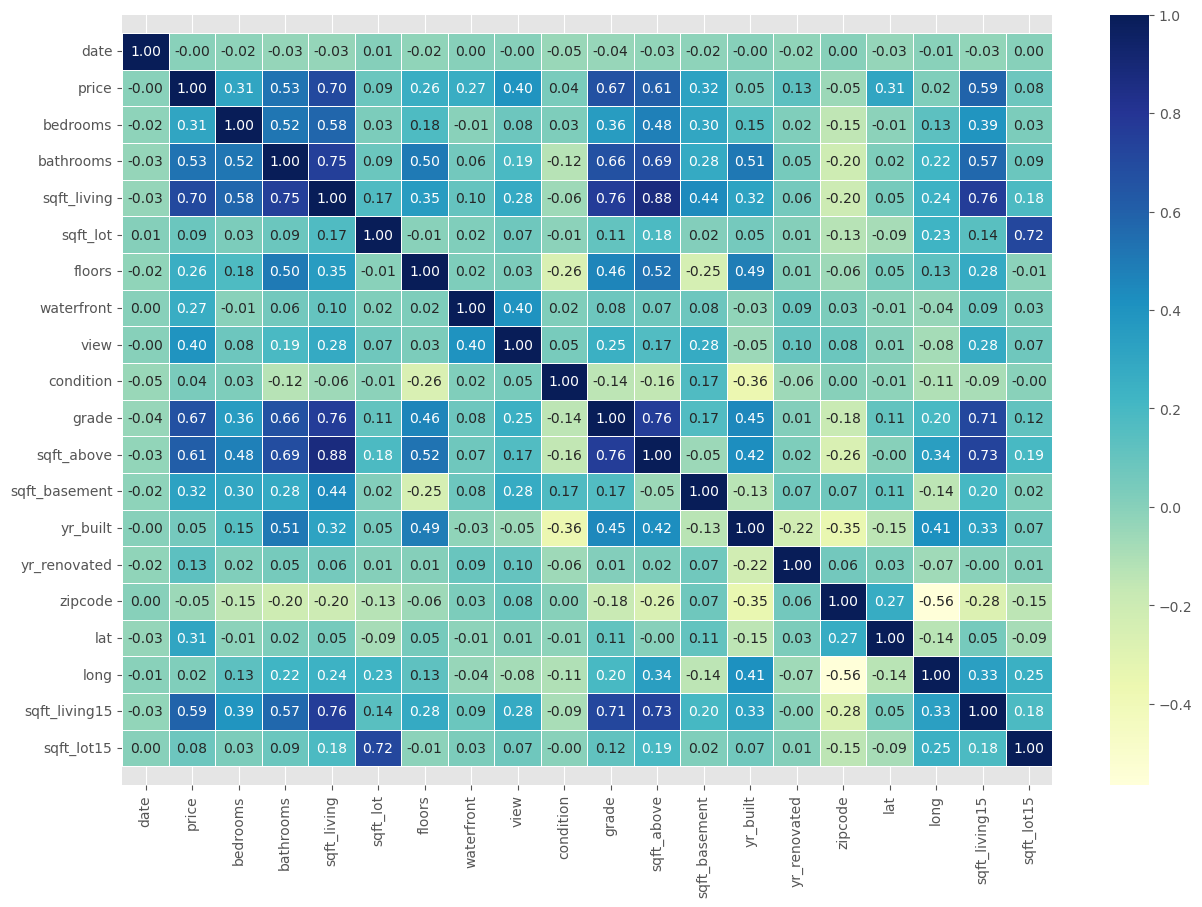

In [20]:
corr_matrix = hp_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
heatmap = sns.heatmap(corr_matrix,
annot=True,
linewidths=0.5,
fmt=".2f",
cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'correlation with price'}>

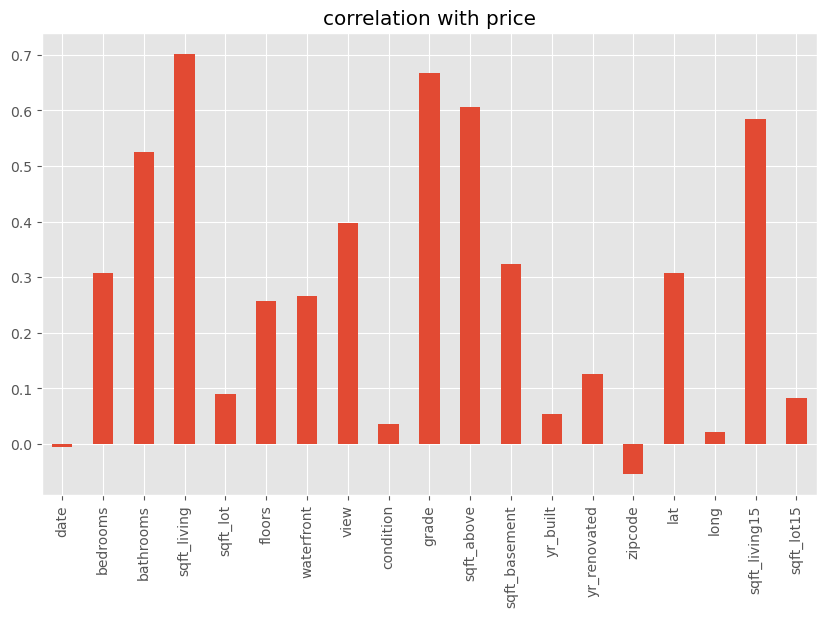

In [21]:
correlation_values = hp_df.drop('price', axis=1).corrwith(hp_df['price'])
correlation_values.plot(kind='bar', grid=True, figsize=(10, 6),title="correlation with price")

In [22]:
hp_df.skew()

date              0.147286
price             4.021716
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

### Splitting The Data Set

In [23]:
from sklearn.model_selection import train_test_split
X=np.array(hp_df.drop(columns="price"))
y=np.array(hp_df.drop(columns='price'))
space=hp_df["sqft_living"]
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=44)
price=hp_df["price"]
print(f"the shape of x_train is {X_train.shape}")
print(f'the shape of x_test is: {X_test.shape}') 
print(f'the shape of y tain is {y_train.shape}')
print(f'the shape of y test is {y_test.shape}')

the shape of x_train is (16209, 19)
the shape of x_test is: (5404, 19)
the shape of y tain is (16209, 19)
the shape of y test is (5404, 19)


In [24]:
from sklearn.metrics import r2_score,mean_absolute_error
model3=LinearRegression()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(f'R2 Score is : {r2_score(y_test, y_pred3)}')
print(f'Mae is : {mean_absolute_error(y_test,y_pred3)}')

R2 Score is : 1.0
Mae is : 1.717661281719988e-12


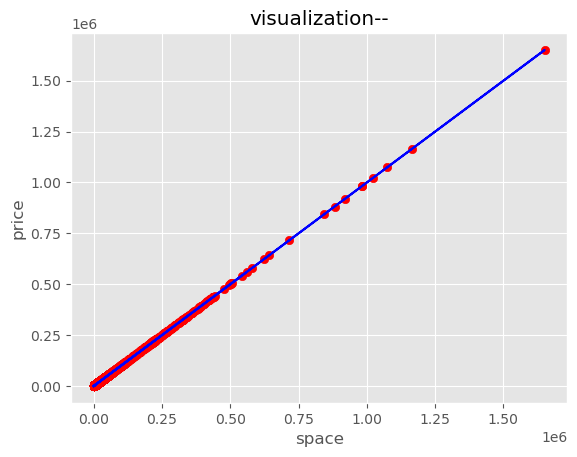

In [25]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_train, color='blue')
plt.title("visualization--")
plt.xlabel('space')
plt.ylabel('price')
plt.show()

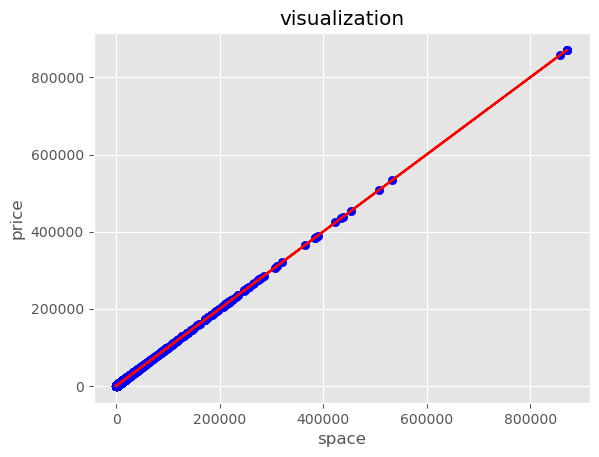

In [26]:
plt.scatter(X_test, y_test, label='Actual data', color="blue")
plt.plot(X_test, y_test, color='red')
plt.title("visualization")
plt.xlabel('space')
plt.ylabel('price')
plt.show()

#                                THANK YOU SO MUCH !.